In [1]:
# Import the relevant modules
import iris
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import iris.quickplot as qplt
import iris.plot as iplt
import datetime
import shutil
from six.moves import urllib
from pathlib import Path
from math import pi
import trackpy
from iris.time import PartialDateTime
import tobac
import warnings

In [2]:
# Import the libraries
import functions
import dictionaries

In [3]:
# Set up the warning messages
warnings.filterwarnings('ignore', category=UserWarning, append=True)
warnings.filterwarnings('ignore', category=RuntimeWarning, append=True)
warnings.filterwarnings('ignore', category=FutureWarning, append=True)
warnings.filterwarnings('ignore', category=pd.io.pytables.PerformanceWarning)

In [4]:
# Load the olr and precip data
olr, time_olr, datetimes_olr, con_olr = functions.load_olr_data(dictionaries.data_file)

# Load the precip data
precip, time_precip, datetimes_precip, con_precip = functions.load_precip_data(dictionaries.precip)

In [5]:
# Set up the directory to save the data
savedir, plot_dir = functions.setup_directories()

In [6]:
# Extract longitude and latitude
longitude,latitude=np.meshgrid(olr.coord('longitude').points,olr.coord('latitude').points)

# Calculate dxy
dxy, dt = functions.calculate_dxy(longitude, latitude, olr)

In [7]:
#sigma = dictionaries.sigma

#tf = (olr.data/sigma)**(0.25)
#tb_var = (-dictionaries.a + np.sqrt(dictionaries.a**2 + 4*dictionaries.b*tf.data))/(2*dictionaries.b)

In [8]:
# Calculate brightness temperatures
tf, tb_var, tb = functions.calculate_temperatures(dictionaries.a, dictionaries.b, dictionaries.sigma, olr)

In [9]:
# Set up the parameters dictionaries
# features parameters
parameters_features = functions.setup_parameters_features(dictionaries.position_threshold, dictionaries.sigma_threshold, dictionaries.target, dictionaries.threshold, dictionaries.n_min_threshold)

# segmentation parameters
parameters_segmentation = functions.setup_parameters_segmentation(dictionaries.target, dictionaries.method, dictionaries.threshold)

# linking parameters
parameters_linking = functions.setup_parameters_linking(dictionaries.n_min_threshold, dictionaries.stubs, dictionaries.order, dictionaries.extrapolate, dictionaries.memory, dictionaries.adaptive_stop, dictionaries.adaptive_step, dictionaries.subnetwork_size, dictionaries.method_linking)

In [10]:
# Now perform the sensitivity analysis
print("Values of threshold to be tested: ", dictionaries.threshold_values)
threshold_values=dictionaries.threshold_values

# Call the sensitivity analysis function
functions.perform_sensitivity_analysis(tb, savedir, parameters_features, parameters_segmentation, parameters_linking, threshold_values)

Frame 743: 16 trajectories present.
[21.17288421 10.04600422  9.60872771 16.44382141  8.61331873 12.16709097
 12.18784249 12.17191568  8.17569397 11.97518395 13.17496664  7.4779105
 19.77238932  9.22758744  8.77688809  5.73515397 10.53363284 14.41402834
  9.31374321 13.23505813 14.21180287  9.26439387 11.44324885 20.06530558
  8.90524168 13.22316259  6.24659774 14.3672535   7.9121077  13.41604851
 12.2021258   7.97697836  6.98312217 10.59056426  7.42332821  6.18550441
 30.06780766 13.45535283 12.16031637 12.94739303  8.62968484 10.68432326
  6.68177098 19.27747293 19.39289895 13.61157923 26.46976144 24.55127969
 16.47223602 13.66250646 13.14287332  7.66103783 15.88251697  9.91422401
  5.47780584  6.42017818 13.76170917 10.43112107  9.26722034  5.57329325
 17.68725794 19.63030975  9.03794573 17.15742811 22.56153    25.46726309
 15.7743927  15.77137771 22.7988461  13.11223155 10.14222074 20.07128502
 19.32337121 11.59965608 11.85674602 16.25285365  8.28245232  8.50232529
 25.26569402 13.

,num_features,mean_area,max_area,min_area,num_tracks,mean_lifetime,max_lifetime,min_lifetime,mean_velocity,max_velocity,min_velocity,threshold
0,5303,148346.110513,8.867131e+05,45874.928571,249,11.333333,51.0,6.0,13.790366,35.261939,2.923374,225
1,6625,168995.518816,1.024989e+06,43713.964286,302,11.592715,52.0,6.0,14.420463,37.081875,2.520675,230
2,7562,198189.854114,1.193501e+06,45911.812500,319,12.354232,53.0,6.0,14.218641,32.758955,1.918535,235
3,8302,216090.281712,1.705501e+06,47619.000000,374,11.585561,66.0,6.0,13.586032,37.621377,2.844890,240
4,8381,227933.528046,1.734623e+06,46831.500000,374,11.596257,66.0,6.0,13.586379,37.972250,2.774013,241
5,8522,263680.271896,1.960194e+06,52157.250000,351,12.282051,113.0,6.0,13.958017,39.005163,2.470221,245


In [11]:
df = pd.read_csv('Save/Jan_1998/sensitivity_analysis_singleTbThreshold.csv')

In [12]:
df

,num_features,mean_area,max_area,min_area,num_tracks,mean_lifetime,max_lifetime,min_lifetime,mean_velocity,max_velocity,min_velocity,threshold
0,5303,148346.110513,8.867131e+05,45874.928571,249,11.333333,51.0,6.0,13.790366,35.261939,2.923374,225
1,6625,168995.518816,1.024989e+06,43713.964286,302,11.592715,52.0,6.0,14.420463,37.081875,2.520675,230
2,7562,198189.854114,1.193501e+06,45911.812500,319,12.354232,53.0,6.0,14.218641,32.758955,1.918535,235
3,8302,216090.281712,1.705501e+06,47619.000000,374,11.585561,66.0,6.0,13.586032,37.621377,2.844890,240
4,8381,227933.528046,1.734623e+06,46831.500000,374,11.596257,66.0,6.0,13.586379,37.972250,2.774013,241
5,8522,263680.271896,1.960194e+06,52157.250000,351,12.282051,113.0,6.0,13.958017,39.005163,2.470221,245


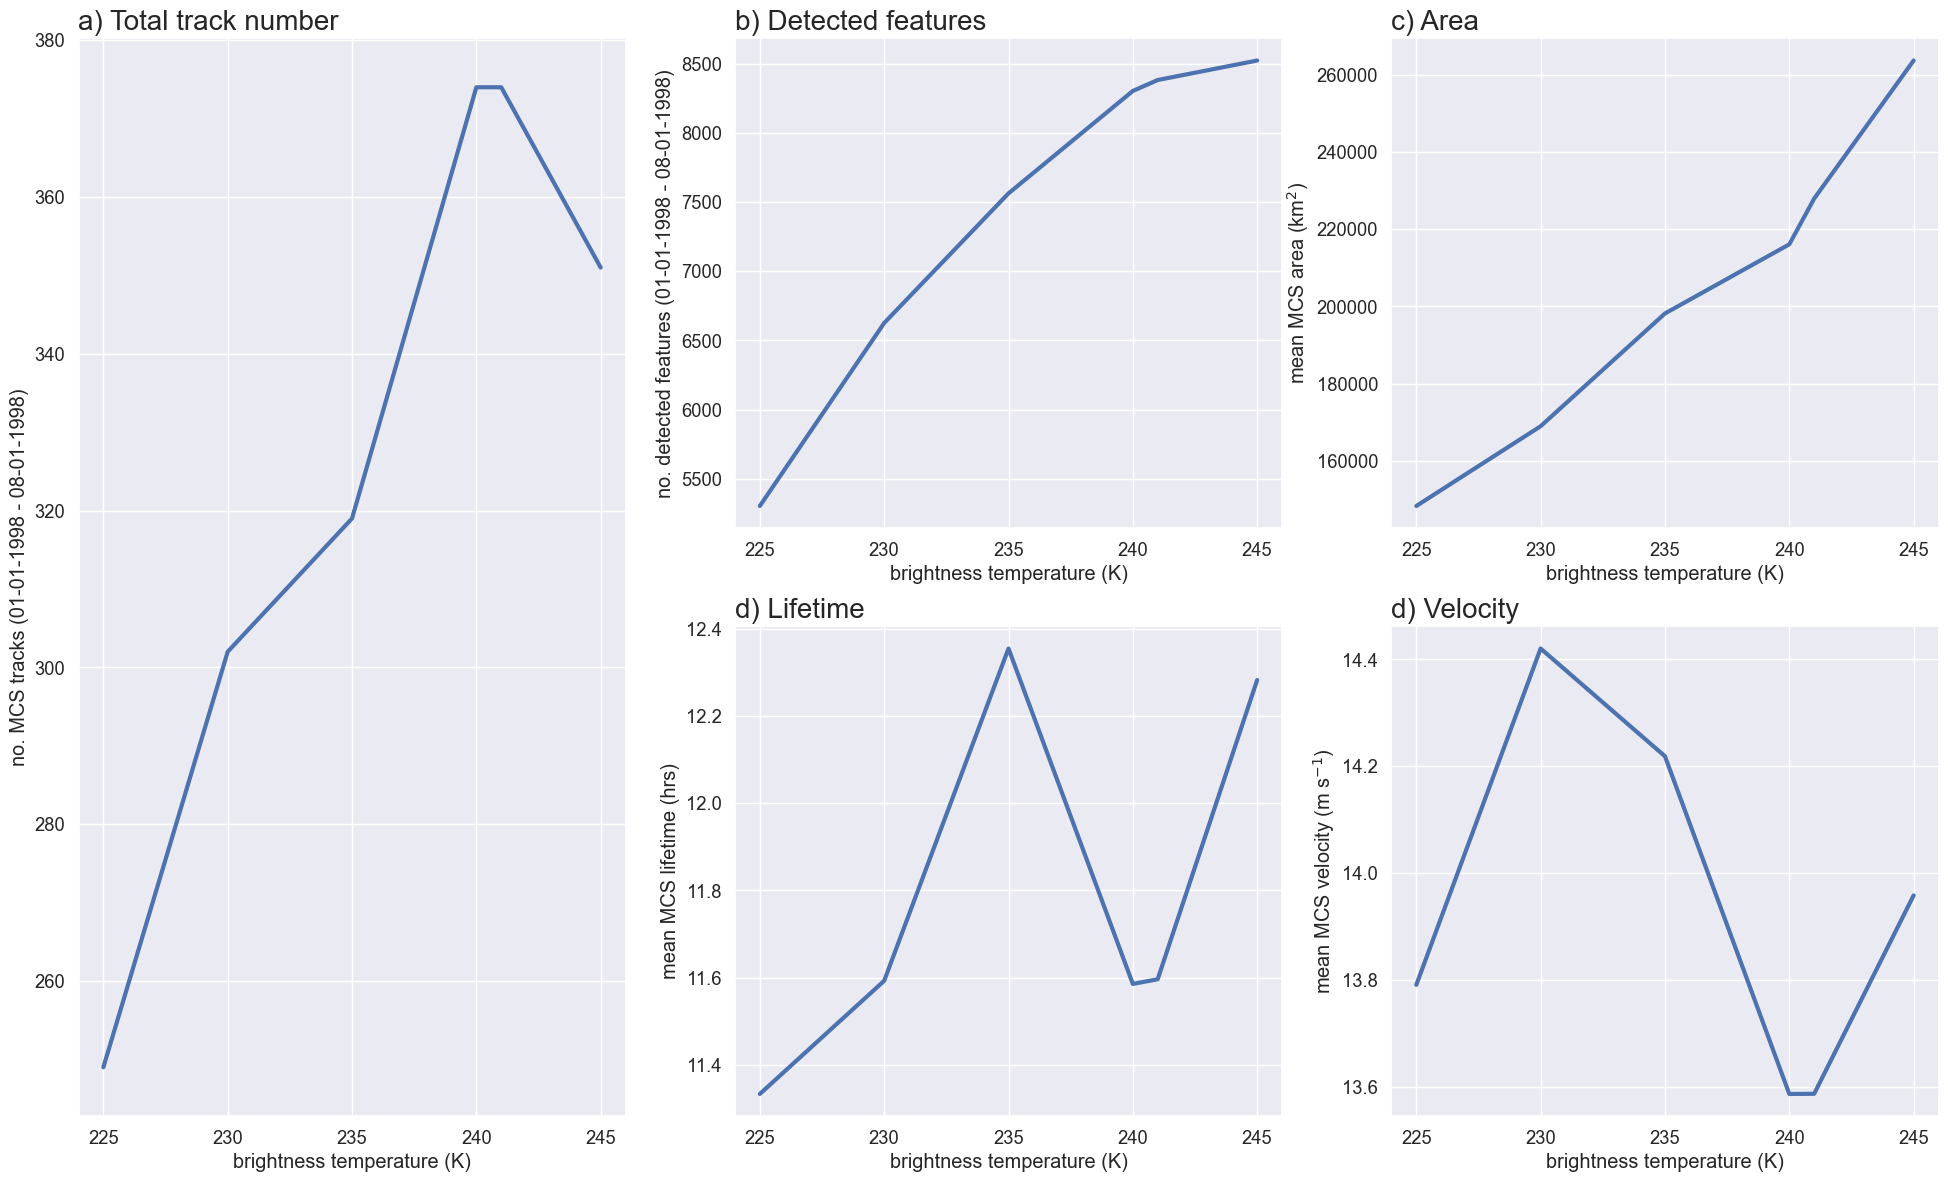

In [13]:
#plot of initiation time of MCSs 
import seaborn as sns 
sns.set(font_scale=1.2)

plt.figure(figsize=(24,14))
f= 20
lf= 15

xticks=[225,230,235,240,245]
ax1=plt.subplot(2,3,(1,4))
ax1.set_title('a) Total track number ', loc='left', fontsize= f )
ax1.plot(df['threshold'],df['num_tracks'],linewidth=3)
ax1.set_xticks(xticks)
ax1.set_ylabel('no. MCS tracks (01-01-1998 - 08-01-1998)')
ax1.set_xlabel('brightness temperature (K)')

ax2=plt.subplot(2,3,2)
ax2.set_title('b) Detected features ', loc='left', fontsize= f )
ax2.plot(df['threshold'],df['num_features'],linewidth=3)
ax2.set_xticks(xticks)
ax2.set_ylabel('no. detected features (01-01-1998 - 08-01-1998)')
ax2.set_xlabel('brightness temperature (K)')

ax3=plt.subplot(2,3,3)
ax3.set_title('c) Area ', loc='left', fontsize= f )
ax3.plot(df['threshold'],df['mean_area'],linewidth=3)
ax3.set_xticks(xticks)
ax3.set_ylabel('mean MCS area (km$^{2}$)')
ax3.set_xlabel('brightness temperature (K)')

ax4=plt.subplot(2,3,5)
ax4.set_title('d) Lifetime ', loc='left', fontsize= f )
ax4.plot(df['threshold'],df['mean_lifetime'],linewidth=3)
ax4.set_xticks(xticks)
ax4.set_ylabel('mean MCS lifetime (hrs)')
ax4.set_xlabel('brightness temperature (K)')

ax5=plt.subplot(2,3,6)
ax5.set_title('d) Velocity ', loc='left', fontsize= f )
ax5.plot(df['threshold'],df['mean_velocity'],linewidth=3)
ax5.set_xticks(xticks)
ax5.set_ylabel('mean MCS velocity (m s$^{-1}$)')
ax5.set_xlabel('brightness temperature (K)')

plt.savefig('Plot/Jan_1998/singleTb/single_tb_analysis.png')
